# HEART DISEASE ANALYSIS

In [5]:
pip install pandas-profiling



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip uninstall pandas-profiling


In [17]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# for basic operations
import numpy as np
import pandas as pd
#import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
#from bubbly.bubbly import bubbleplot
import warnings
import statsmodels.api as sm

#for data preprocessing and feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc



DATA SET DESCRIPTION
Set Characteristics : Multivariate
Attribute Characteristics : Categorical, Integer, Real
Associated Tasks : Classification
Data Set Information
It is a Clevelant Dadabase. It contains 76 attributes , but all published experiments refer to using a subset of 14 attributes of them.
It is a Heart Disease Analysis of 303 persons which inclide their age, sex and all the basic health related experimental data(like cholestrol, fasting blood sugar etc) to analysis their Heart Perforamnce The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

column name : Description

age : The person's age in years

sex : The person's sex (1 = male, 0 = female)

cp : The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)
    
column name : Description

age : The person's age in years

sex : The person's sex (1 = male, 0 = female)

cp : The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps : The person's resting blood pressure (mm Hg on admission to the hospital)

chol : The person's cholesterol measurement in mg/dl

fbs : The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg : Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach : The person's maximum heart rate achieved

exang : Exercise induced angina (1 = yes; 0 = no)

oldpeak : ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope : the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca : The number of major vessels (0-3)

thal : A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target : Heart disease (0 = no, 1 = yes)

## Reading the data

In [9]:
data = pd.read_csv("C:\\Users\\teddy\\Downloads\\heart.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [10]:
# getting the shape
data.shape

(303, 14)

In [9]:
# reading the head of the data
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## DATA PREPROCESSING

In [10]:
# describing the data
data.describe(include='all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
#no. of rows
print('No. of records',data.shape[0])

No. of records 303


In [12]:
#no. of columns
print('No. of columns',data.shape[1])

No. of columns 14


In [13]:
# computer memory used by dataframe in bytes
used_pc_memory = data.memory_usage(deep=True).sum()
used_pc_memory = used_pc_memory/(1000*1000)
print('This data frame is using {0:.2f} MB computer memory'.format(used_pc_memory))

This data frame is using 0.03 MB computer memory


In [14]:
# removing duplicate rows
data.drop_duplicates(inplace=True)
data.shape

(302, 14)

In [15]:
# creating column name's list
col = data.columns.to_list()

# printing number of unique values in each column.
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

## CREATING CATEGORICAL COLUMN

In [16]:
# creating catagorical columns name list
catcol = [_ for _ in col if data[_].nunique() < 30]

# printing all the unique values of categorical colum
for _ in catcol:
    print('{} has {} unique value/s - {}\n'.format(_,data[_].nunique(),data[_].unique()))

sex has 2 unique value/s - [1 0]

cp has 4 unique value/s - [3 2 1 0]

fbs has 2 unique value/s - [1 0]

restecg has 3 unique value/s - [0 1 2]

exang has 2 unique value/s - [0 1]

slope has 3 unique value/s - [0 2 1]

ca has 5 unique value/s - [0 2 1 3 4]

thal has 4 unique value/s - [1 2 3 0]

target has 2 unique value/s - [1 0]



## HANDLING MISSING VALUES

In [21]:
pip install matplotlib seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


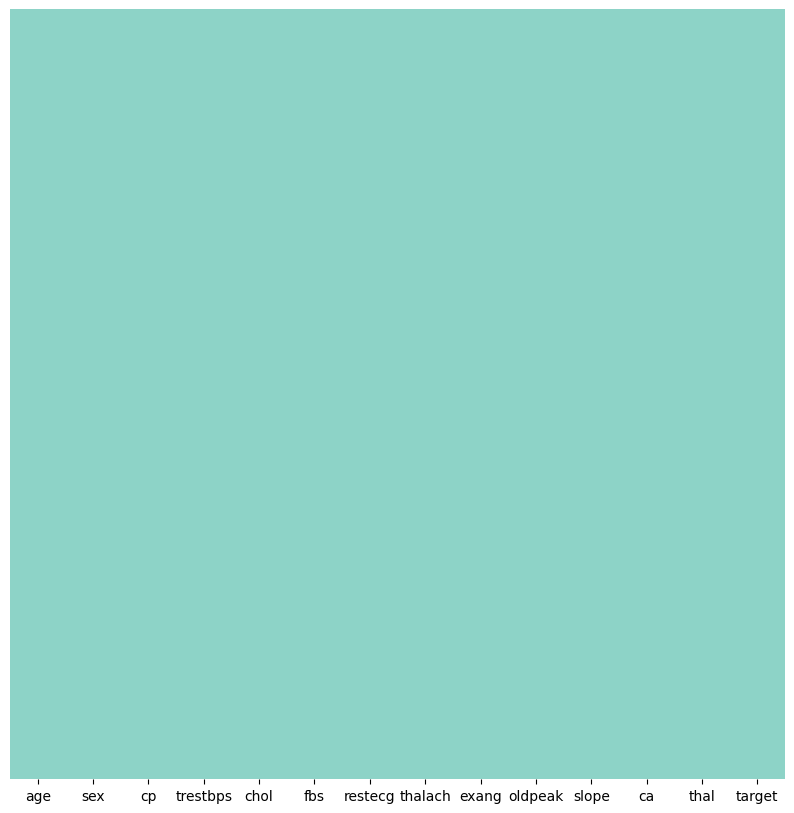

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB
<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   se

In [25]:
import matplotlib.pyplot as plt  # Importing matplotlib
import seaborn as sns           # Importing seaborn

# Checking for null or missing values in the dataframe
plt.figure(figsize=(10,10))
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='Set3')
plt.show()

# Displaying dataframe info (optional)
data.info()

data.info()

There are NO MISSING VALUES in the Data Set

## OUTLIER ANALYSIS

Text(0.5, 1.0, 'Outlier Box Plot')

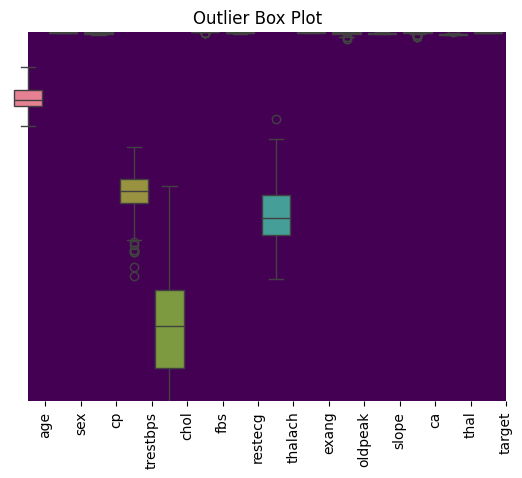

In [26]:
# to check for presence of an outlier

import seaborn as sns           # Importing seaborn
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
sns.boxplot(data =data).set_title("Outlier Box Plot")

There is NO SIGNIFICANT OUTLIER present in the Data Set.

## DATA PROFILLING

In [28]:
pip install pandas-profiling


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
pip install pandas-profiling==3.1.0 pydantic==1.10.12


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 4.2 MB/s eta 0:00:01
   -------------------- ------------------- 1.6/3.1 MB 3.8 MB/s eta 0:00:01
   -------------------------- ------------- 2.1/3.1 MB 3.4 MB/s eta 0:00:01
   ------------------------------ --------- 2.4/3.1 MB 3.1 MB/s eta 0:00:01
   ------------------------------------ --- 2.9/3.1 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 3.1/3.1 MB 2.6 MB/s eta 0:00:00
  Created wheel for markupsafe: filename=MarkupSafe-2.0.1-py3-none-any.whl size=9767 sha256=527650fe9850158481cf24b8bf0d9443e9dd227e1f495e623bcca

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-learn 1.5.2 requires joblib>=1.2.0, but you have joblib 1.0.1 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
pip install pydantic==1.10.12


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## DATA VISUALISATION

In [7]:
import warnings

warnings.filterwarnings('ignore')


In [9]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.1 MB 2.6 MB/s eta 0:00:08
   -- ------------------------------------- 1.3/19.1 MB 2.4 MB/s eta 0:00:08
   --- ------------------------------------ 1.6/19.1 MB 2.6 MB/s eta 0:00:07
   --- ------------------------------------ 1.8/19.1 MB 2.2 MB/s eta 0:00:08
   ---- ----------------------------------- 2.4/19.1 MB 2.0 MB/s eta 0:00:09
   ----- ---------------------------------- 2.6/19.1 MB 1.9 MB/s eta 0:00:09
   ------ --------------------------------- 2.9/19.1 MB 1.8 MB/s eta 0:00:09
   ------ --------------------------------- 3.1/19.1 MB 1.8 MB/s eta 0:00:09
   ------- -------------------------------- 3.4/19.1 MB 1.7 MB/s eta 0:00:10
   ------- -------------------------------- 3.7/19.1 MB 1.7 MB/s eta 0:00:10
   -------- ------------------------------- 4.2/19.1 MB 1.7 MB/s eta 0:00:09
   --------- 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import plotly.express as px
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [1]:
pip install plotly



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

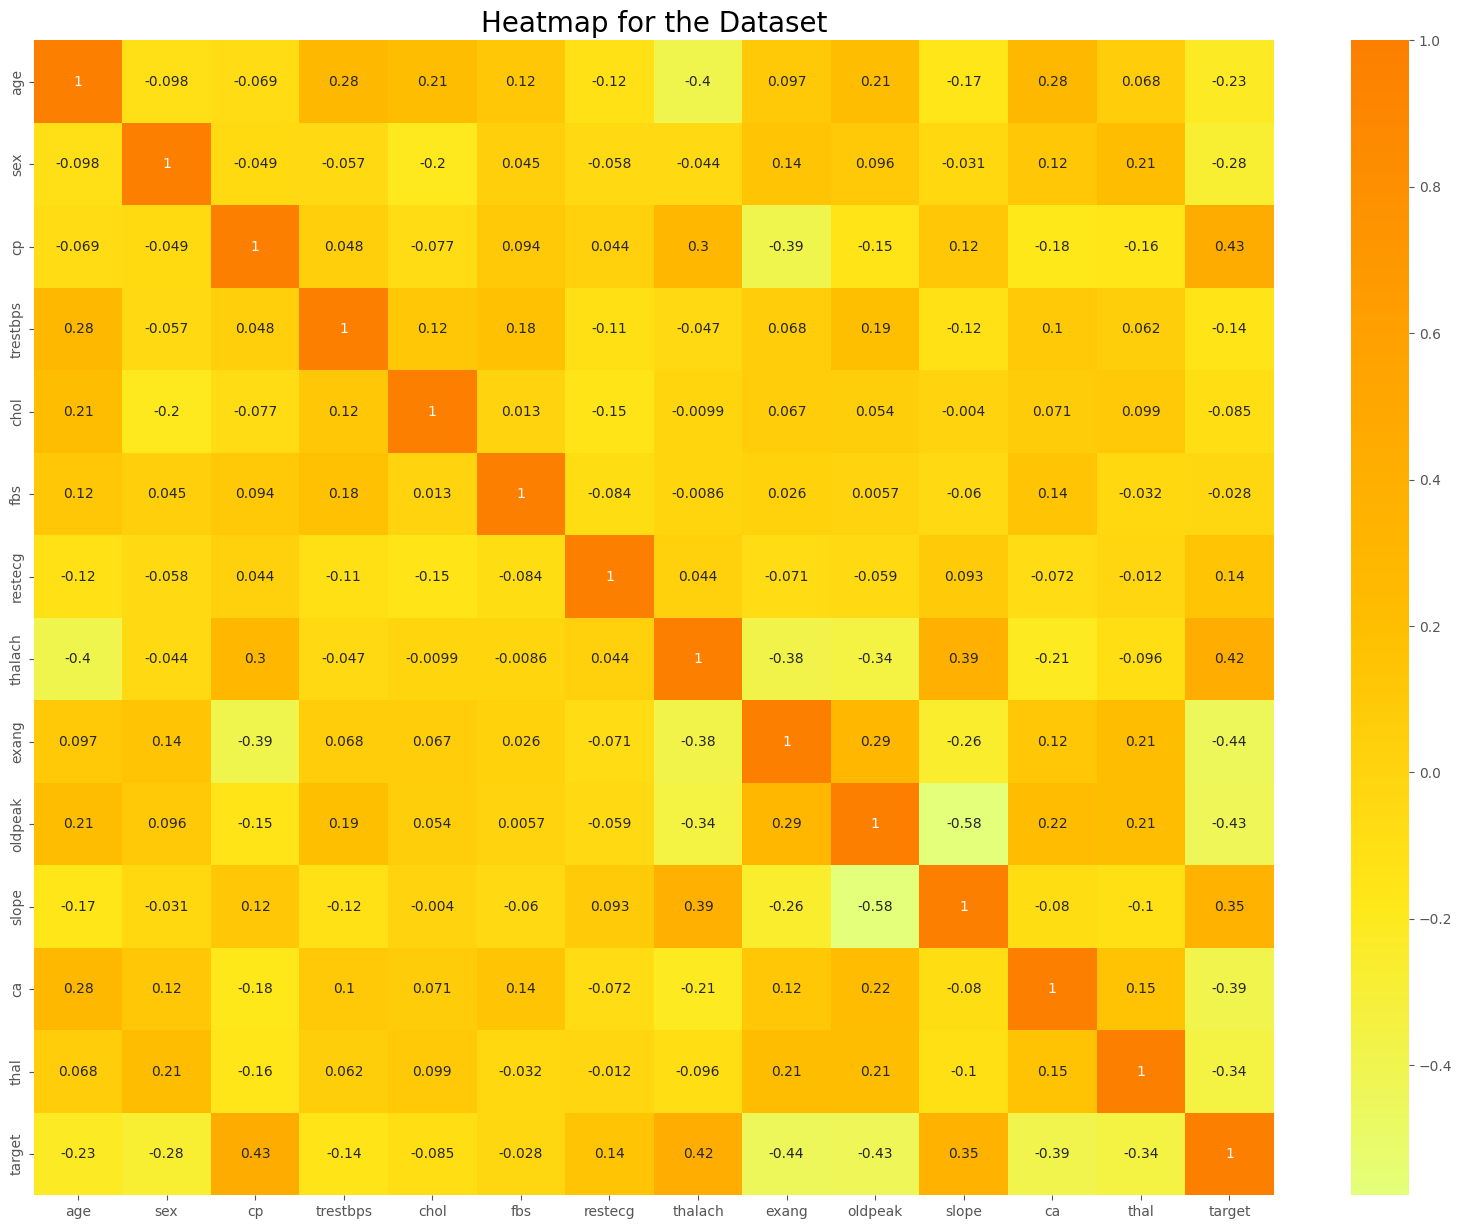

In [12]:
plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

The above heat map is to show the correlations amongst the different attributes of the given dataset. The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

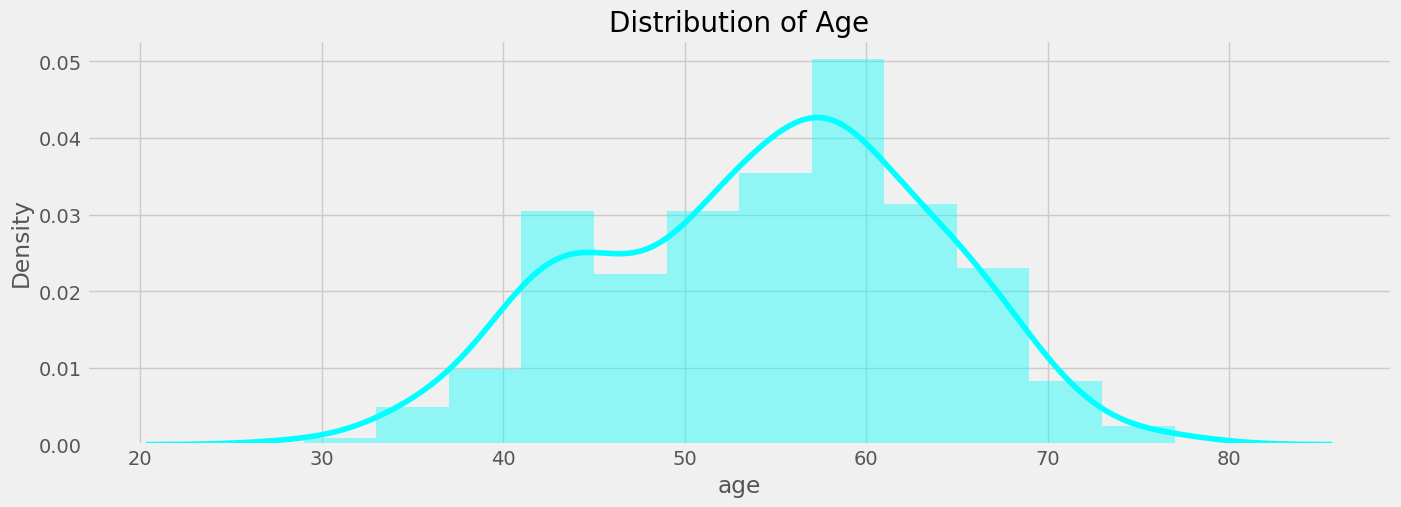

In [13]:
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.

As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

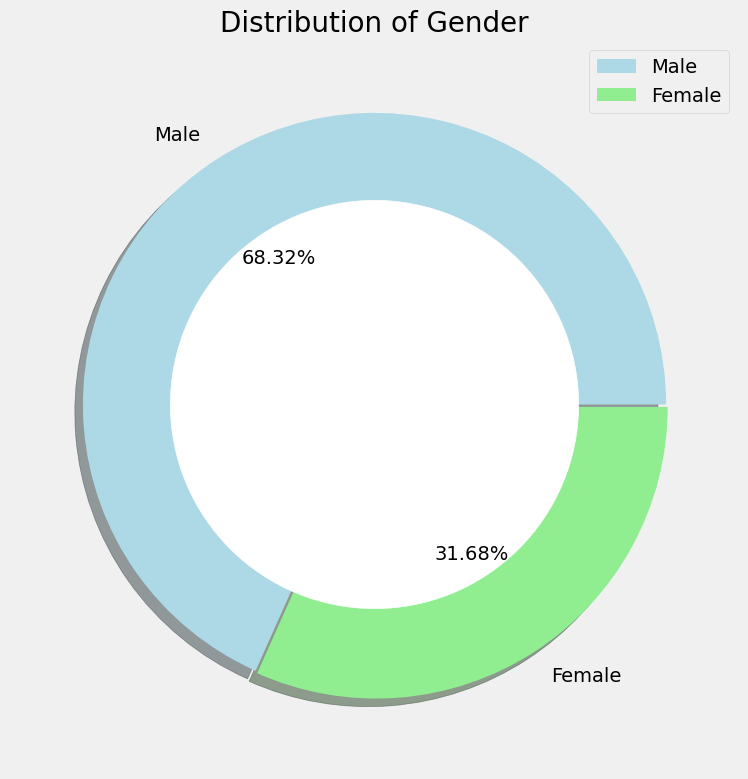

In [14]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()


The above Pie chart, whhich shows us the distribution of Gender in the Heart diseases. By looking at the plot, we can assume that Males are two times more likely to suffer from heart diseases in comparison to females.

According to our study, From all the Entries in our dataset 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups.

The above Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.

Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

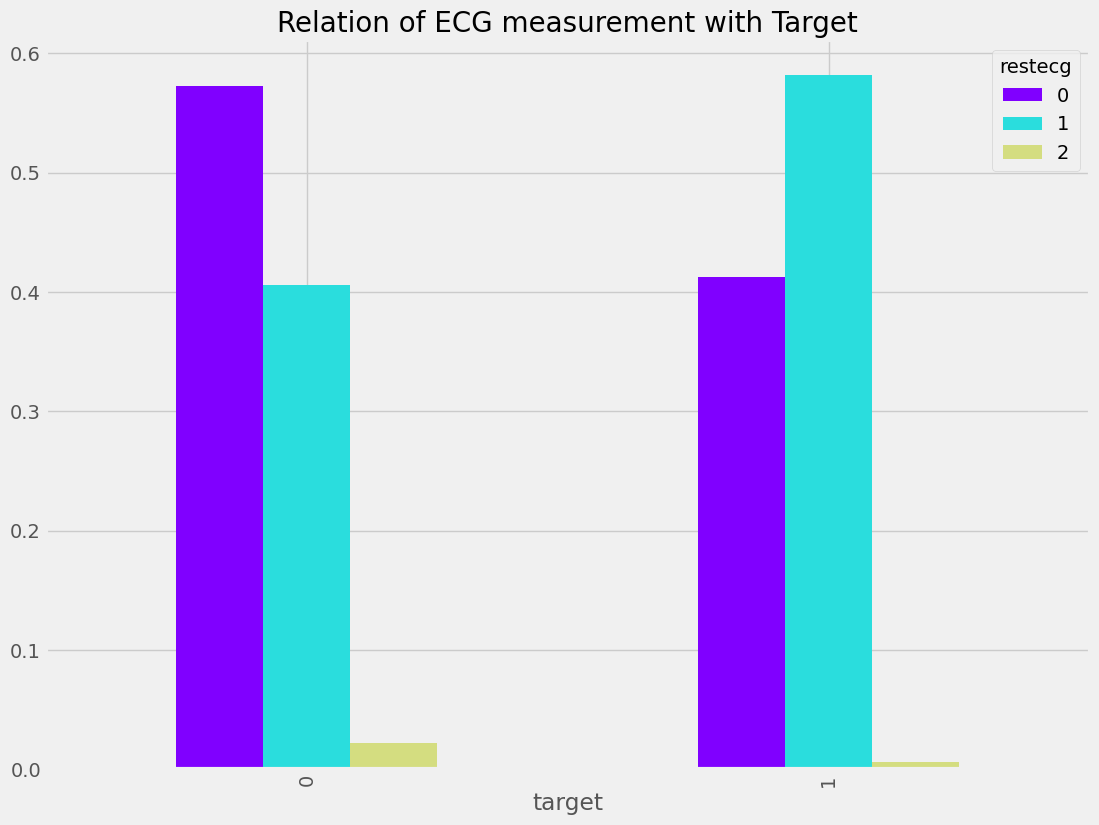

In [16]:
# Resting electrocardiographic measurement vs target
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

The above plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

This Heat Map, between Target and Maximum Heart Rate shows that the patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.

This implies it is very important to keep our heart rates low, to keep ourselves healthy and safe from any dangerous heart diseases.


In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

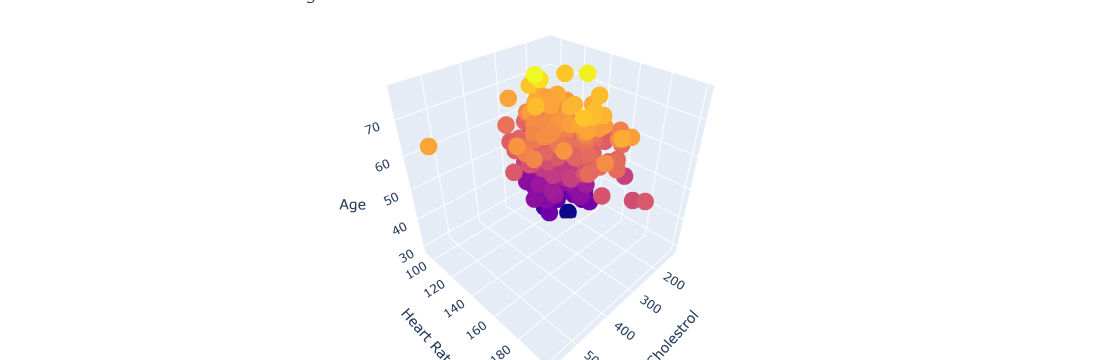

In [18]:
trace = go.Scatter3d(
    x = data['chol'],
    y = data['trestbps'],
    z = data['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

## CHANGING COLUMN NAMES

In [20]:
# let's change the names of the  columns for better understanding

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [21]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [22]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

## ONE HOT ENCODING

In [23]:
# one hot encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0

data = pd.get_dummies(data, drop_first=True)

In [37]:
# checking the dataset after encoding
data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,True,False,True,False,False,False,True,False,False,False,False,True,False
1,37,130,250,187,3.5,0,1,True,True,False,False,True,False,False,False,False,False,True,False,False
2,41,130,204,172,1.4,0,1,False,False,False,True,True,False,True,False,True,False,True,False,False
3,56,120,236,178,0.8,0,1,True,False,False,True,True,False,False,False,True,False,True,False,False
4,57,120,354,163,0.6,0,1,False,False,False,False,True,False,False,True,True,False,True,False,False


## MODELLING

### SPLITTING THE DATA SET

In [24]:
# taking the labels out from the data

y = data['target']

data = data.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (303,)


In [39]:
# splitting the dependent and independent variables from the data

x = data

# checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [40]:
y.value_counts()

target
1    165
0    138
Name: count, dtype: int64

## TRAINING AND TEST DATA SETS

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# splitting the sets into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#test_size=0.3 means data set divided into 70% and 30%
# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (212, 19)
Shape of x_test : (91, 19)
Shape of y_train : (212,)
Shape of y_test : (91,)


In [51]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   -- ------------------------------------- 0.5/9.8 MB 1.2 MB/s eta 0:00:08
   --- ------------------------------------ 0.8/9.8 MB 780.2 kB/s eta 0:00:12
   ---- ----------------------------------- 1.0/9.8 MB 898.8 kB/s eta 0:00:10
   ----- ---------------------------------- 1.3/9.8 MB 958.5 kB/s eta 0:00:09
   ------ --------------------------------- 1.6/9.8 MB 1.0 MB/s eta 0:00:09
   --------- ------------------------------ 2.4/9.8 MB 1.3 MB/s eta 0:00:06
   ---------- ----------------------------- 2.6/9.8 MB 1.3 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.8 MB 1.3 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.8 MB 1.3 MB/s eta 0:00:06
   ------------ --------------------------- 3.1/9.8 MB 1.2 MB/s eta 0:00:06
   -------------- --


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [53]:
#Logistic Regression

#Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

model =  LogisticRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("TRAINING ACCURACY :", model.score(x_train, y_train))
print("TESTING ACCURACY :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# Genarate Reports
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())
print(result.summary2())

#LOGISTIC REGRESSION RESULT

TRAINING ACCURACY : 0.8773584905660378
TESTING ACCURACY : 0.8351648351648352
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        44
           1       0.80      0.91      0.85        47

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91

Optimization terminated successfully.
         Current function value: 0.316438
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                           18
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.5392
Time:                        23:42:19   Log-Likelihood:                -67.085
converged:          

In [54]:
# Decision Tree Classifier

#NO NEED OF FEATURE SCALING
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)


# evaluating the model
print("TRAINING ACCURACY :", model.score(x_train, y_train))
print("TESTING ACCURACY :", model.score(x_test, y_test))

# cofusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

# Genarate Reports
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())
print(result.summary2())

TRAINING ACCURACY : 0.9292452830188679
TESTING ACCURACY : 0.7802197802197802
              precision    recall  f1-score   support

           0       0.83      0.68      0.75        44
           1       0.75      0.87      0.80        47

    accuracy                           0.78        91
   macro avg       0.79      0.78      0.78        91
weighted avg       0.79      0.78      0.78        91

Optimization terminated successfully.
         Current function value: 0.316438
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                           18
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.5392
Time:                        23:42:31   Log-Likelihood:                -67.085
converged:          

In [55]:
# Random Forest Classifier

#NO NEED OF FEATURE SCALING
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#x_train = sc.fit_transform(x_train)
#x_test = sc.transform(x_test)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("TRAINING ACCURACY :", model.score(x_train, y_train))
print("TESTING ACCURACY :", model.score(x_test, y_test))

# cofusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

# Genarate Reports
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())
print(result.summary2())

TRAINING ACCURACY : 0.9386792452830188
TESTING ACCURACY : 0.8021978021978022
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        44
           1       0.81      0.81      0.81        47

    accuracy                           0.80        91
   macro avg       0.80      0.80      0.80        91
weighted avg       0.80      0.80      0.80        91

Optimization terminated successfully.
         Current function value: 0.316438
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      193
Method:                           MLE   Df Model:                           18
Date:                Thu, 21 Nov 2024   Pseudo R-squ.:                  0.5392
Time:                        23:42:36   Log-Likelihood:                -67.085
converged:          

## Specificity and Sensitivity

Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

### Sensitivity = TruePositives/TruePositives+FalseNegatives

### Specificity = FalseNegatives/FalseNegatives+TruePositives

In [56]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.7954545454545454
Specificity :  0.8085106382978723


## ROC CURVE

In [59]:
# Import the required libraries
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

## AUC SCORE

In [61]:
# let's check the auc score
from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.8936170212765958


# CONCLUSION :

In a comparitive study of various models that I have implemented in this Data Set namely Logistic Regression, Decision Tree and Random Forest.
It have been proved that RANDOM FOREST is best suitable model for this Data Set with highest level of Accuracy.

### THANK YOU!!!